# Steepest Descent on Torch

In [1]:
"""We create the function and compute its gradient in a given point."""

import torch

# We use a tensor for the initial point (1.5,0)
x0 = torch.tensor([1.5], dtype=torch.float, requires_grad=True)
y0 = torch.tensor([0], dtype=torch.float, requires_grad=True)

f = 2*x0**3 - 6*x0*y0 + 3*y0**2

# We send the variables we need to use for our gradient i.e. two variables

f.backward()

print(f"Gradient is ({x0.grad.item()},{y0.grad.item()}).")

Gradient is (13.5,-9.0).


In [2]:
""" We use a function and use the capabilities of torch to compute the gradient."""

x0 = torch.tensor([1.5], dtype=torch.float, requires_grad=True)
y0 = torch.tensor([0.5], dtype=torch.float, requires_grad=True)

def fun(x,y):
    return 2*x**3 - 6*x*y + 3*y**3

for it in range(3):
    f_val = fun(x0,y0) # We evaluate the function
    f_val.backward() # Compute the gradient
    print(f"Iteration {it}: The gradient ({x0.grad.item()}, {y0.grad.item()})")

# Notice that they get acumulated.

print("We need to make the gradients 0.")

Iteration 0: The gradient (10.5, -6.75)
Iteration 1: The gradient (21.0, -13.5)
Iteration 2: The gradient (31.5, -20.25)
We need to make the gradients 0.


In [18]:
""" Implementing the steepest descent with Torch. """

def steepest_descent(f, x0, y0, alpha, total_it):
    """Returns a potential minimum point for f, computed using
       steepest descent.

     Parameters
     ----------
     f: function
         function that returns a single scalar.
     x0,y0: float
         tensor variables that hold the initial point for the algorithm.
     alpha: float
         The learning rate for the algorithm.
     total_it: int > 0
         The total number of iterations that the algorithm will do.

    Returns
    -------
    tuple
        a tuple holding the coordiantes of the "minimum" point as tensors.
    """
    # copy the values of x0, y0 in new variable tensors
    x = torch.tensor(x0, dtype=torch.float, requires_grad=True)
    y = torch.tensor(y0, dtype=torch.float, requires_grad=True)
    print("Iteration \t f(x,y) \t x0 \t y0")
    for it in range(total_it):
        if x.grad:
            x.grad.data.zero_()
        if y.grad:
            y.grad.data.zero_()
        f_val = f(x,y)
        f_val.backward() # Compute the gradient
        with torch.no_grad(): # We don't need to comute latter a gradient on this operations
            x += -alpha*x.grad
            y += -alpha*y.grad
        print(f"{it+1} \t {f_val.item()} \t {x.item()} \t {y.item()}")
    return x.item(), y.item()


In [20]:
"""Testing the function."""

x0, y0 = -0.5, 1.5

steepest_descent(fun, x0, y0, 0.001, 18)

Iteration 	 f(x,y) 	 x0 	 y0
1 	 14.375 	 -0.4925000071525574 	 1.4767500162124634
2 	 13.786325454711914 	 -0.4850948452949524 	 1.4541678428649902
3 	 13.229121208190918 	 -0.477781742811203 	 1.4322258234024048
4 	 12.701265335083008 	 -0.4705580472946167 	 1.4108977317810059
5 	 12.2008056640625 	 -0.46342119574546814 	 1.3901586532592773
6 	 11.72594165802002 	 -0.4563688039779663 	 1.3699852228164673
7 	 11.275022506713867 	 -0.4493985176086426 	 1.3503552675247192
8 	 10.846519470214844 	 -0.44250813126564026 	 1.3312476873397827
9 	 10.439022064208984 	 -0.4356955289840698 	 1.3126426935195923
10 	 10.051230430603027 	 -0.4289586544036865 	 1.2945212125778198
11 	 9.681933403015137 	 -0.42229557037353516 	 1.2768653631210327
12 	 9.330015182495117 	 -0.4157043695449829 	 1.2596580982208252
13 	 8.994440078735352 	 -0.4091832935810089 	 1.2428832054138184
14 	 8.674245834350586 	 -0.4027305841445923 	 1.2265253067016602
15 	 8.368538856506348 	 -0.3963445723056793 	 1.2105696201

(-0.3775711953639984, 1.1649796962738037)

Iteration 	 f(x,y) 	 x0 	 y0
last tol: [[2.24645779e-05 1.96693835e-05]]


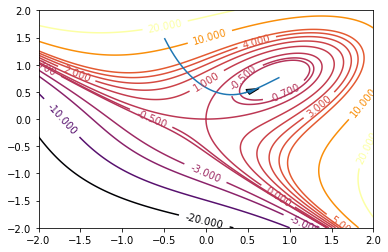

In [63]:
import matplotlib.pyplot as plt
import numpy as np

def steepest_descent_sequence(f, x0, y0, alpha, total_it):
    """Returns a potential minimum point for f, computed using
       steepest descent.

     Parameters
     ----------
     f: function
         function that returns a single scalar.
     x0,y0: float
         tensor variables that hold the initial point for the algorithm.
     alpha: float
         The learning rate for the algorithm.
     total_it: int > 0
         The total number of iterations that the algorithm will do.

    Returns
    -------
    numpy
        an array with tuples of the points of the algorithm as rows.
    """
    # copy the values of x0, y0 in new variable tensors
    x = torch.tensor(x0, dtype=torch.float, requires_grad=True)
    y = torch.tensor(y0, dtype=torch.float, requires_grad=True)
    print("Iteration \t f(x,y) \t x0 \t y0")
    data = np.zeros((total_it, 2))
    for it in range(total_it):
        if x.grad:
            x.grad.data.zero_()
        if y.grad:
            y.grad.data.zero_()
        f_val = f(x,y)
        f_val.backward() # Compute the gradient
        with torch.no_grad(): # We don't need to comute latter a gradient on this operations
            x += -alpha*x.grad
            y += -alpha*y.grad
        data[it,:] = [x.item(), y.item()]
    print(f"last tol: {(data[-1:] - data[-2,:])/data[-1,]}")
    return data

def f(x,y):
    return 2*x**3 - 6*x*y + 3*y**3

curve = steepest_descent_sequence(fun, x0, y0, 0.001, 1200)

x = np.linspace(-2, 2, 1500)
y = np.linspace(-2, 2, 1500)

X, Y = np.meshgrid(x,y)
Z = f(X, Y)

fig, ax = plt.subplots()
contours = ax.contour(X, Y, Z, cmap='inferno',
                     levels=[-20, -10,-5, -3, -0.7, -0.5, 0, 1, 2, 3, 4, 5, 10, 20])
contours.levels = [val for val in contours.levels]
ax.clabel(contours, contours.levels, inline=True, fontsize=10)
diff = curve[320,:] - curve[300,:]
ax.arrow(curve[300,0], curve[300,1], diff[0], diff[1],
         shape='full', head_width=0.1)
ax.plot(curve[:,0], curve[:,1])

# Steepest Descent in TensorFlow

In [38]:
"""We create the function and compute its gradient in a given point."""
import tensorflow as tf

# We use a variable for the initial point (1.5,0)
x0 = tf.Variable([1.5])
y0 = tf.Variable([0.0])

# We create the computational graph for the given function.
with tf.GradientTape() as tp:
    f = 2*x0**3 - 6*x0*y0 + 3*y0**2

df = tp.gradient(f, [x0,y0])
print(f"graf f({x0.numpy()[0]},{y0.numpy()[0]}) = ({df[0][0]},{df[1][0]})")

graf f(1.5,0.0) = (13.5,-9.0)


In [39]:
"""We don't have the percistency here."""

x0 = tf.Variable([1.5])
y0 = tf.Variable([0.0])

def fun(x,y):
    return 2*x**3 - 6*x*y + 3*y**3

for it in range(3):
    with tf.GradientTape() as tp:
        f = 2*x0**3 - 6*x0*y0 + 3*y0**2
    df = tp.gradient(f, [x0,y0])
    print(f"graf f({x0.numpy()[0]},{y0.numpy()[0]}) = ({df[0][0]},{df[1][0]})")

graf f(1.5,0.0) = (13.5,-9.0)
graf f(1.5,0.0) = (13.5,-9.0)
graf f(1.5,0.0) = (13.5,-9.0)


In [80]:
""" Implementing the steepest descent with Torch. """

def steepest_descent(f, x0, y0, alpha, total_it):
    """Returns a potential minimum point for f, computed using
       steepest descent.

     Parameters
     ----------
     f: function
         function that returns a single scalar.
     x0,y0: float
         tensor variables that hold the initial point for the algorithm.
     alpha: float
         The learning rate for the algorithm.
     total_it: int > 0
         The total number of iterations that the algorithm will do.

    Returns
    -------
    tuple
        a tuple holding the coordiantes of the "minimum" point as tensors.
    """
    # copy the values of x0, y0 in new variable.
    x = tf.Variable(x0)
    y = tf.Variable(y0)
    print("Iteration \t f(x,y) \t x0 \t y0")
    for it in range(total_it):
        with tf.GradientTape() as tp:
            f_val = f(x,y)
        dx, dy = tp.gradient(f_val, [x,y])
        x.assign(x-alpha*dx)
        y.assign(y-alpha*dy)
        print(f"{it+1} \t {f_val.numpy()} \t {x.numpy()} \t {y.numpy()}")
        


In [72]:
"""Testing the function."""

x0, y0 = 1.5, 2.0

steepest_descent(fun, x0, y0, 0.01, 18)


Iteration 	 f(x,y) 	 x0 	 y0
1 	 12.75 	 1.4850000143051147 	 1.7300000190734863
2 	 6.668369293212891 	 1.456486463546753 	 1.5497390031814575
3 	 3.8023838996887207 	 1.4221895933151245 	 1.4209760427474976
4 	 2.235313892364502 	 1.3860907554626465 	 1.3245818614959717
5 	 1.2821073532104492 	 1.3502907752990723 	 1.2498407363891602
6 	 0.6551756858825684 	 1.3158841133117676 	 1.1902689933776855
7 	 0.21841096878051758 	 1.283407211303711 	 1.141715407371521
8 	 -0.09910058975219727 	 1.253082036972046 	 1.1014035940170288
9 	 -0.337374210357666 	 1.2249534130096436 	 1.0674104690551758
10 	 -0.5205464363098145 	 1.1989673376083374 	 1.0383647680282593
11 	 -0.6640081405639648 	 1.1750178337097168 	 1.0132646560668945
12 	 -0.7780354022979736 	 1.1529736518859863 	 0.9913622736930847
13 	 -0.8697504997253418 	 1.1326944828033447 	 0.9720887541770935
14 	 -0.9442455768585205 	 1.1140400171279907 	 0.9550043344497681
15 	 -1.0052545070648193 	 1.0968751907348633 	 0.9397637248039246


(1.0530941486358643, 0.9026117324829102)

In [84]:
"""Second test for function."""

def fun(x,y):
    return x*y*tf.math.exp(-(x**2+y**2)/2.0)

x0,y0 = 0.5, 0.5

steepest_descent(fun, x0, y0, 0.1, 30)

Iteration 	 f(x,y) 	 x0 	 y0
1 	 0.1947001963853836 	 0.4707949757575989 	 0.4707949757575989
2 	 0.1775837242603302 	 0.4414355456829071 	 0.4414355456829071
3 	 0.1603635549545288 	 0.4121868312358856 	 0.4121868312358856
4 	 0.14335158467292786 	 0.3833172917366028 	 0.3833172917366028
5 	 0.12685424089431763 	 0.3550860285758972 	 0.3550860285758972
6 	 0.11114979535341263 	 0.32773059606552124 	 0.32773059606552124
7 	 0.0964689552783966 	 0.3014567494392395 	 0.3014567494392395
8 	 0.08298182487487793 	 0.2764313519001007 	 0.2764313519001007
9 	 0.07079267501831055 	 0.2527787983417511 	 0.2527787983417511
10 	 0.059941984713077545 	 0.23058079183101654 	 0.23058079183101654
11 	 0.0504145510494709 	 0.2098791003227234 	 0.2098791003227234
12 	 0.042151015251874924 	 0.19068028032779694 	 0.19068028032779694
13 	 0.03506074100732803 	 0.17296163737773895 	 0.17296163737773895
14 	 0.029034029692411423 	 0.15667741000652313 	 0.15667741000652313
15 	 0.023952553048729897 	 0.1417